## Preprocessing
<ul>
     <li>Handling missing values</li>
     <li>Clean Data</li>
     <li>Encode categorical features</li>
     <li>Feature selection</li>
</ul>

In [1]:
from extra_libraries import *

In [2]:
filepath = "C:\\Users\\Nikolas Theol\\AppData\\Local\\Programs\\Python\\Python38\\Scripts\\azureai-2021-team4\\data"
file = 'listings.csv'
total_filepath = filepath + "\\" + file

raw = pd.read_csv(total_filepath)

In [3]:
df = pd.DataFrame(data = raw)
pd.set_option('display.max_columns', None)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20210221153847,2021-02-23,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98863,23.76527,Entire apartment,Entire home/apt,8,NaN,2 baths,3.0,5.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",$84.00,1,45,1.0,4.0,45.0,45.0,1.9,45.0,NaN,t,0,23,53,234,2021-02-23,25,2,0,2011-05-20,2020-10-06,97.0,10.0,10.0,10.0,10.0,9.0,10.0,478825,t,6,6,0,0,0.21
1,10990,https://www.airbnb.com/rooms/10990,20210221153847,2021-02-23,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98903,23.76448,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Fre...",$50.00,1,60,1.0,2.0,60.0,60.0,1.2,60.0,NaN,t,21,51,81,356,2021-02-23,44,11,0,2012-09-06,2020-12-10,98.0,10.0,10.0,10.0,10.0,10.0,10.0,400315,t,6,6,0,0,0.43
2,10993,https://www.airbnb.com/rooms/10993,20210221153847,2021-02-23,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98888,23.76473,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Heating"", ""Bed linens"", ""Washer \u2013\u00a0...",$40.00,1,60,1.0,4.0,60.0,60.0,1.4,60.0,NaN,t,25,55,85,

In [4]:
from geopy import distance

def calculate_distance(lat1, log1, lat2, log2) :
    x = (lat1,log1)
    y = (lat2,log2)
    z = distance.distance(x, y).m
    return z



In [6]:
df_metro = pd.read_csv('data\metro_stations.csv')

min_metro_dis = []
 
for i in range(0,len(df['latitude'])):
    min_dis = []
 
    for j in range(0,len(df_metro['latitude'])):
        min_dis.append(calculate_distance(df['latitude'][i], df['longitude'][i] , df_metro['latitude'][j], df_metro['longitude'][j]))
        
    min_metro_dis.append(min(min_dis))


In [7]:
df_metro['latitude'].dtypes
 
series_distance = pd.Series(min_metro_dis)

df['distance_from_metro(meters)'] = series_distance

In [8]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters)
0,10595,https://www.airbnb.com/rooms/10595,20210221153847,2021-02-23,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98863,23.76527,Entire apartment,Entire home/apt,8,NaN,2 baths,3.0,5.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",$84.00,1,45,1.0,4.0,45.0,45.0,1.9,45.0,NaN,t,0,23,53,234,2021-02-23,25,2,0,2011-05-20,2020-10-06,97.0,10.0,10.0,10.0,10.0,9.0,10.0,478825,t,6,6,0,0,0.21,517.290182
1,10990,https://www.airbnb.com/rooms/10990,20210221153847,2021-02-23,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98903,23.76448,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Fre...",$50.00,1,60,1.0,2.0,60.0,60.0,1.2,60.0,NaN,t,21,51,81,356,2021-02-23,44,11,0,2012-09-06,2020-12-10,98.0,10.0,10.0,10.0,10.0,10.0,10.0,400315,t,6,6,0,0,0.43,456.124476
2,10993,https://www.airbnb.com/rooms/10993,20210221153847,2021-02-23,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,97%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98888,23.76473,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Heating"", ""Bed linens"", ""Washer \u2013\u00a0...",$40.

## Replace price , bathrooms_text and acceptance rate

In [9]:
df['price'] = df['price'].apply(replace_price)
df['log_price'] = np.log(df['price'])

c:\users\nikolas theol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


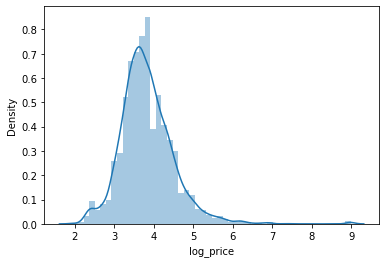

<Figure size 432x288 with 0 Axes>

In [10]:
sns.distplot(df.log_price)
fig = plt.figure()

c:\users\nikolas theol\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


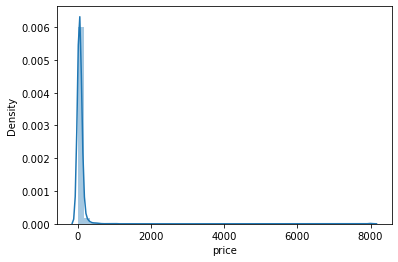

<Figure size 432x288 with 0 Axes>

In [11]:
sns.distplot(df.price)
fig = plt.figure()

In [12]:
df = df[df['host_acceptance_rate'].notna()]
df = df[df['host_response_time'].notna()]


df.host_response_rate = df.host_response_rate.apply(floatize_acceptance_rate)
df.host_acceptance_rate = df.host_acceptance_rate.apply(floatize_acceptance_rate)

In [13]:
float(df['bathrooms_text'][0].split(' ')[0])

2.0

In [14]:
df = df[df['bathrooms_text'].notna()]

In [15]:
df = df.reset_index(drop=True)

In [16]:
df['bathrooms_text'].unique()

array(['2 baths', '1 bath', '1.5 baths', '5.5 baths', '3 baths',
       '1 shared bath', '4 baths', '3.5 baths', '2.5 baths',
       '1.5 shared baths', '1 private bath', '0 baths', '2 shared baths',
       '4.5 baths', '5 baths', 'Half-bath', '8 baths', '3 shared baths',
       '6.5 baths', '2.5 shared baths', '12 baths', '49.5 baths',
       '0 shared baths', '3.5 shared baths'], dtype=object)

In [17]:
df['bathrooms'] = df['bathrooms_text'].apply(encode_baths)

In [18]:
df['bathrooms'].unique()

array([ 2. ,  1. ,  1.5,  5.5,  3. ,  4. ,  3.5,  2.5,  0. ,  4.5,  5. ,
        0.5,  8. ,  6.5, 12. , 49.5])

In [19]:
df['bathroom_is_private'] = df['bathrooms_text'].apply(encode_share_baths)

In [20]:
df['bathroom_is_private'].unique()

array([1, 0], dtype=int64)

In [21]:
df = df.drop(['bathrooms_text'], axis=1)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters),log_price,bathroom_is_private
0,10595,https://www.airbnb.com/rooms/10595,20210221153847,2021-02-23,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100.0,97.0,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98863,23.76527,Entire apartment,Entire home/apt,8,2.0,3.0,5.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",84.0,1,45,1.0,4.0,45.0,45.0,1.9,45.0,NaN,t,0,23,53,234,2021-02-23,25,2,0,2011-05-20,2020-10-06,97.0,10.0,10.0,10.0,10.0,9.0,10.0,478825,t,6,6,0,0,0.21,517.290182,4.430817,1
1,10990,https://www.airbnb.com/rooms/10990,20210221153847,2021-02-23,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100.0,97.0,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98903,23.76448,Entire apartment,Entire home/apt,4,1.0,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Fre...",50.0,1,60,1.0,2.0,60.0,60.0,1.2,60.0,NaN,t,21,51,81,356,2021-02-23,44,11,0,2012-09-06,2020-12-10,98.0,10.0,10.0,10.0,10.0,10.0,10.0,400315,t,6,6,0,0,0.43,456.124476,3.912023,1
2,10993,https://www.airbnb.com/rooms/10993,20210221153847,2021-02-23,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100.0,97.0,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.98888,23.76473,Entire apartment,Entire home/apt,2,1.0,NaN,1.0,"[""Heating"", ""Bed linens"", ""Washer \u20

In [22]:
df.shape

(6345, 76)

## Remove outliers

In [23]:
df = remove_outliers(df,'price',0,1000)
df = remove_outliers(df,'maximum_nights',0,1200)
df = remove_outliers(df,'minimum_nights',0,500)


## Drop columns

In [24]:
drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'host_name', 'neighborhood_overview', 'description'
             , 'picture_url', 'host_id','host_has_profile_pic', 'host_url', 'host_location', 'host_about', 'host_thumbnail_url'
             , 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']

df1 = df.drop(drop_cols , axis=1)

## Missing values
columns with many missing values will also be dropped

In [25]:
df1.isna().sum()

id                                                 0
name                                               1
host_since                                         0
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_identity_verified                             0
neighbourhood                                   1547
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    6334
latitude                                           0
longitude                                          0
property_type                                      0
room_type                                          0
accommodates                                       0
bathrooms                                     

In [26]:
df1 = df1.drop(['id','name','host_since','host_listings_count','neighbourhood_group_cleansed','neighbourhood','calendar_updated','property_type',
               'availability_30','availability_60','availability_365','license','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights'
               ,'minimum_nights_avg_ntm','maximum_nights_avg_ntm','first_review','last_review','number_of_reviews_ltm','number_of_reviews_l30d',],axis=1)

In [27]:
df1.isna().sum()

host_response_time                                0
host_response_rate                                0
host_acceptance_rate                              0
host_is_superhost                                 0
host_total_listings_count                         0
host_identity_verified                            0
neighbourhood_cleansed                            0
latitude                                          0
longitude                                         0
room_type                                         0
accommodates                                      0
bathrooms                                         0
bedrooms                                        566
beds                                             35
amenities                                         0
price                                             0
minimum_nights                                    0
maximum_nights                                    0
has_availability                                  0
availability

In [28]:
df1.beds=df1.beds.fillna(1)
df1.bedrooms = df1.bedrooms.fillna(1)

df1.dropna(subset = ['review_scores_rating'], inplace=True)
df1.dropna(subset = ['review_scores_accuracy'], inplace=True)
df1.dropna(subset = ['review_scores_communication'], inplace=True)
df1.dropna(subset = ['review_scores_value'], inplace=True)
df1.dropna(subset = ['review_scores_communication'], inplace=True)
df1.dropna(subset = ['host_response_time'], inplace=True)
df1.dropna(subset = ['review_scores_location'], inplace=True)
df1.dropna(subset = ['reviews_per_month'], inplace=True)
df1.dropna(subset = ['host_identity_verified'], inplace=True)
df1.dropna(subset = ['host_total_listings_count'], inplace=True)
df1.dropna(subset = ['host_is_superhost'], inplace=True)

df1.isna().sum()

host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
has_availability                                0
availability_90                                 0


In [29]:
df1.shape

(5374, 37)

In [30]:
num_df = df1.select_dtypes(exclude='object').copy()
num_df.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters),log_price,bathroom_is_private
0,100.0,97.0,6.0,37.98863,23.76527,8,2.0,3.0,5.0,84.0,1,45,53,25,97.0,10.0,10.0,10.0,10.0,9.0,10.0,6,6,0,0,0.21,517.290182,4.430817,1
1,100.0,97.0,6.0,37.98903,23.76448,4,1.0,1.0,1.0,50.0,1,60,81,44,98.0,10.0,10.0,10.0,10.0,10.0,10.0,6,6,0,0,0.43,456.124476,3.912023,1
2,100.0,97.0,6.0,37.98888,23.76473,2,1.0,1.0,1.0,40.0,1,60,85,58,97.0,10.0,10.0,10.0,10.0,10.0,10.0,6,6,0,0,0.57,477.307520,3.688879,1
3,100.0,97.0,6.0,37.98903,23.76448,4,1.0,1.0,2.0,50.0,1,60,53,23,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,6,0,0,0.18,456.124476,3.912023,1
4,100.0,97.0,6.0,37.98924,23.76500,4,1.0,1.0,1.0,50.0,1,30,81,17,95.0,10.0,10.0,10.0,10.0,9.0,9.0,6,6,0,0,0.17,445.556888,3.912023,1


## Encode categorical data

In [31]:
df1['host_is_superhost'] = df1['host_is_superhost'].apply(clean)
df1['host_identity_verified'] = df1['host_identity_verified'].apply(clean)
df1['has_availability'] = df1['has_availability'].apply(clean)
df1['instant_bookable'] = df1['instant_bookable'].apply(clean)

In [32]:
df1.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters),log_price,bathroom_is_private
0,within an hour,100.0,97.0,1,6.0,1,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,8,2.0,3.0,5.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",84.0,1,45,1,53,25,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,6,6,0,0,0.21,517.290182,4.430817,1
1,within an hour,100.0,97.0,1,6.0,1,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,4,1.0,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Fre...",50.0,1,60,1,81,44,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.43,456.124476,3.912023,1
2,within an hour,100.0,97.0,1,6.0,1,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,2,1.0,1.0,1.0,"[""Heating"", ""Bed linens"", ""Washer \u2013\u00a0...",40.0,1,60,1,85,58,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.57,477.307520,3.688879,1
3,within an hour,100.0,97.0,1,6.0,1,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,4,1.0,1.0,2.0,"[""Bed linens"", ""Washer \u2013\u00a0In unit"", ""...",50.0,1,60,1,53,23,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.18,456.124476,3.912023,1
4,within an hour,100.0,97.0,1,6.0,1,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,4,1.0,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",50.0,1,30,1,81,17,95.0,10.0,10.0,10.0,10.0,9.0,9.0,1,6,6,0,0,0.17,445.556888,3.912023,1


In [33]:
obj_df = df1.select_dtypes(include=['object']).copy()
obj_df.head()

,host_response_time,neighbourhood_cleansed,room_type,amenities
0,within an hour,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri..."
1,within an hour,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Fre..."
2,within an hour,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,"[""Heating"", ""Bed linens"", ""Washer \u2013\u00a0..."
3,within an hour,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,"[""Bed linens"", ""Washer \u2013\u00a0In unit"", ""..."
4,within an hour,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri..."


In [34]:
df1.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [35]:
df1.neighbourhood_cleansed.unique()

array(['ΑΜΠΕΛΟΚΗΠΟΙ', 'ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ', 'ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ',
       'ΝΕΑ ΚΥΨΕΛΗ', 'ΣΤΑΔΙΟ', 'ΚΟΛΩΝΑΚΙ', 'ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ',
       '1Ο ΝΕΚΡΟΤΑΦΕΙΟ', 'ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ', 'ΚΕΡΑΜΕΙΚΟΣ',
       'ΝΕΟΣ ΚΟΣΜΟΣ', 'ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ', 'ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ',
       'ΘΗΣΕΙΟ', 'ΠΕΔΙΟ ΑΡΕΩΣ', 'ΠΕΤΡΑΛΩΝΑ', 'ΑΚΡΟΠΟΛΗ', 'ΠΑΓΚΡΑΤΙ',
       'ΠΡΟΜΠΟΝΑ', 'ΓΚΑΖΙ', 'ΝΙΡΒΑΝΑ', 'ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ', 'ΙΛΙΣΙΑ',
       'ΖΑΠΠΕΙΟ', 'ΚΥΨΕΛΗ', 'ΚΟΛΩΝΟΣ', 'ΒΟΤΑΝΙΚΟΣ', 'ΛΥΚΑΒΗΤΤΟΣ', 'ΓΚΥΖΗ',
       'ΚΟΛΟΚΥΝΘΟΥ', 'ΠΕΝΤΑΓΩΝΟ', 'ΠΑΤΗΣΙΑ', 'ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
       'ΑΝΩ ΚΥΨΕΛΗ', 'ΡΗΓΙΛΛΗΣ', 'ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ', 'ΓΟΥΔΙ', 'ΠΟΛΥΓΩΝΟ',
       'ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ', 'ΕΛΛΗΝΟΡΩΣΩΝ', 'ΑΝΩ ΠΑΤΗΣΙΑ', 'ΓΟΥΒΑ',
       'ΣΕΠΟΛΙΑ', 'ΡΙΖΟΥΠΟΛΗ'], dtype=object)

In [36]:
df1.host_response_time.unique()

array(['within an hour', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [37]:
room_dummies = pd.get_dummies(df1.room_type)

In [38]:
neighbourhood_dummies = pd.get_dummies(df1.neighbourhood_cleansed)

In [39]:
response_dummies = pd.get_dummies(df1.host_response_time)

In [40]:
df1 = pd.concat([df1, response_dummies], axis=1)

In [41]:
df1 = pd.concat([df1, room_dummies], axis=1)

In [42]:
df1 = pd.concat([df1, neighbourhood_dummies], axis=1)

In [43]:
df1 = df1.drop(['neighbourhood_cleansed','room_type','host_response_time'],axis=1)
df1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters),log_price,bathroom_is_private,a few days or more,within a day,within a few hours,within an hour,Entire home/apt,Hotel room,Private room,Shared room,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,ΑΚΡΟΠΟΛΗ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΝΩ ΚΥΨΕΛΗ,ΑΝΩ ΠΑΤΗΣΙΑ,ΒΟΤΑΝΙΚΟΣ,ΓΚΑΖΙ,ΓΚΥΖΗ,ΓΟΥΒΑ,ΓΟΥΔΙ,ΕΛΛΗΝΟΡΩΣΩΝ,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,ΖΑΠΠΕΙΟ,ΘΗΣΕΙΟ,ΙΛΙΣΙΑ,ΚΕΡΑΜΕΙΚΟΣ,ΚΟΛΟΚΥΝΘΟΥ,ΚΟΛΩΝΑΚΙ,ΚΟΛΩΝΟΣ,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,ΚΥΨΕΛΗ,ΛΥΚΑΒΗΤΤΟΣ,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,ΝΕΑ ΚΥΨΕΛΗ,ΝΕΟΣ ΚΟΣΜΟΣ,ΝΙΡΒΑΝΑ,ΠΑΓΚΡΑΤΙ,ΠΑΤΗΣΙΑ,ΠΕΔΙΟ ΑΡΕΩΣ,ΠΕΝΤΑΓΩΝΟ,ΠΕΤΡΑΛΩΝΑ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,ΠΟΛΥΓΩΝΟ,ΠΡΟΜΠΟΝΑ,ΡΗΓΙΛΛΗΣ,ΡΙΖΟΥΠΟΛΗ,ΣΕΠΟΛΙΑ,ΣΤΑΔΙΟ,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
0,100.0,97.0,1,6.0,1,37.98863,23.76527,8,2.0,3.0,5.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",84.0,1,45,1,53,25,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,6,6,0,0,0.21,517.290182,4.430817,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100.0,97.0,1,6.0,1,37.98903,23.76448,4,1.0,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Fre...",50.0,1,60,1,81,44,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.43,456.124476,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100.0,97.0,1,6.0,1,37.98888,23.76473,2,1.0,1.0,1.0,"[""Heating"", ""Bed linens"", ""Washer \u2013\u00a0...",40.0,1,60,1,85,58,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.57,477.307520,3.688879,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,97.0,1,6.0,1,37.98903,23.76448,4,1.0,1.0,2.0,"[""Bed linens"", ""Washer \u2013\u00a0In unit"", ""...",50.0,1,60,1,53,23,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.18,456.124476,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100.0,97.0,1,6.0,1,37.98924,23.76500,4,1.0,1.0,1.0,"[""Bed linens"", ""Host greets you"", ""Iron"", ""Cri...",50.0,1,30,1,81,17,95.0,10.0,10.0,10.0,10.0,9.0,9.0,1,6,6,0,0,0.17,445.556888,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Encode amenities with weights

In [44]:
message1='Number of unique amenities is {}'
message2='List of amenities={}'
all_amenities_listings,unique_amenities_listings = get_amenities(df1,message1,message2)


Number of unique amenities is 488 

List of amenities=[' " Miele refrigerator"', ' "22\\" HDTV with Netflix"', ' "22\\" HDTV"', ' "24\\" HDTV with Netflix', ' "30\\" TV with Netflix"', ' "32\\" HDTV with Netflix', ' "32\\" HDTV with Netflix"', ' "32\\" HDTV"', ' "32\\" TV with Netflix"', ' "32\\" TV"', ' "38\\" HDTV with Netflix"', ' "40\\" HDTV with Netflix', ' "40\\" HDTV with Netflix"', ' "40\\" HDTV with standard cable"]', ' "40\\" HDTV"', ' "40\\" TV"', ' "42\\" HDTV with Netflix"', ' "42\\" HDTV with standard cable"', ' "42\\" HDTV"', ' "42\\" TV with Netflix', ' "42\\" TV"', ' "43\\" HDTV with Netflix', ' "43\\" HDTV with Netflix"', ' "43\\" HDTV with standard cable"', ' "43\\" HDTV"]', ' "44\\" HDTV with Netflix"', ' "48\\" HDTV with Netflix', ' "48\\" HDTV with Netflix"', ' "49\\" HDTV with Netflix', ' "50\\" HDTV with Netflix', ' "50\\" HDTV with Netflix"', ' "50\\" HDTV"', ' "50\\" TV with Netflix"', ' "52\\" HDTV with Netflix', ' "55\\" HDTV with Netflix', ' "55\\" HDTV wi

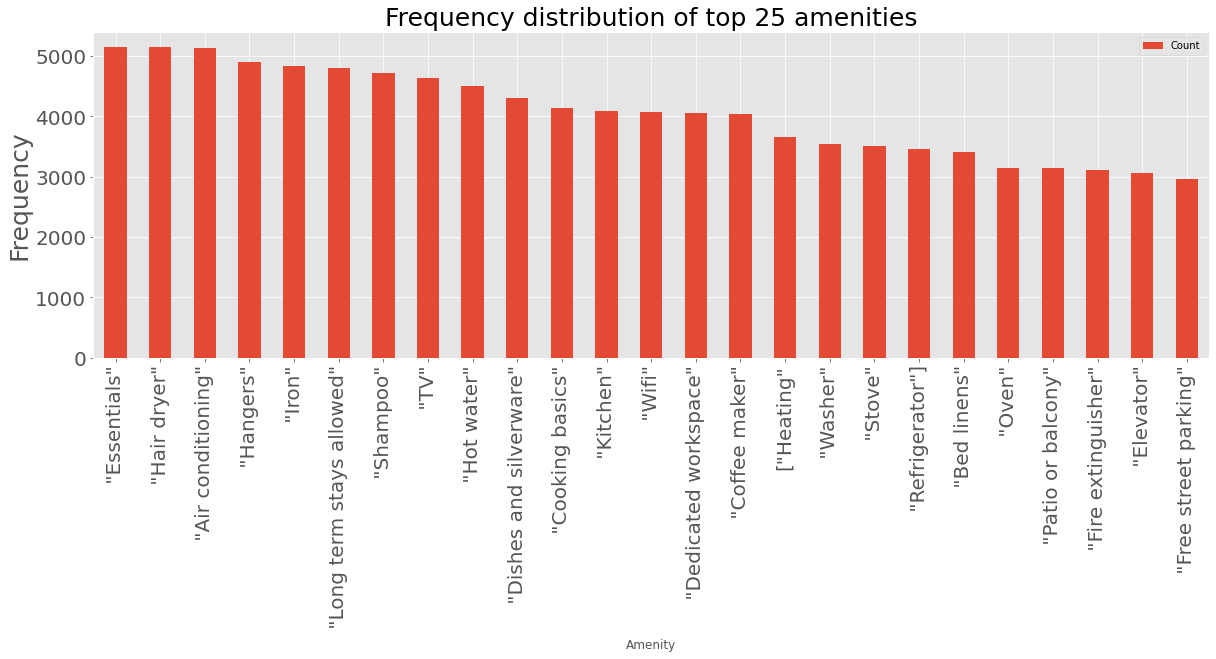

In [45]:
amenities=all_amenities_listings
title='Frequency distribution of top 25 amenities'
amenities_freq_dist_listings=amenities_frequency_plot(amenities,title,True)

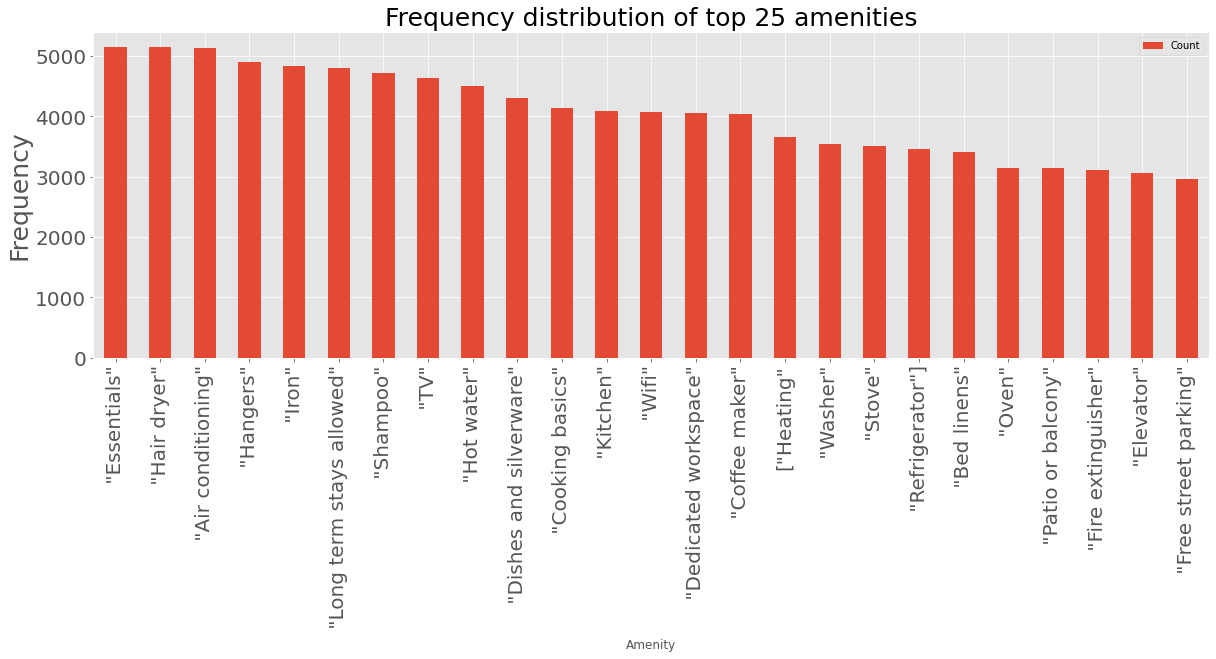

In [46]:
fdist = FreqDist(amenities)
d = pd.DataFrame({'Amenity': list(fdist.keys()),'Count': list(fdist.values())})
d2=d.copy()
d2 = d2.nlargest(columns="Count", n = 25)
plt.rcParams['figure.figsize']=(20,6)
d2.plot(x='Amenity',y='Count',kind='bar')
plt.ylabel('Frequency',fontsize=25)
plt.title(title,fontsize=25)
plt.tick_params(labelsize=20)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
amenities_freq_dist_listings

,Amenity,Count
0,"[""Bed linens""",206
1,"""Host greets you""",1418
2,"""Iron""",4836
3,"""Crib""",1066
4,"""Free street parking""",2953
...,...,...
483,"""Candy refrigerator""",2
484,"""Candy stainless steel oven""",1
485,"""Neff stainless steel oven""",1
486,"""Panten body soap""",1


In [48]:
df1.amenities

0       ["Bed linens", "Host greets you", "Iron", "Cri...
1       ["Bed linens", "Host greets you", "Iron", "Fre...
2       ["Heating", "Bed linens", "Washer \u2013\u00a0...
3       ["Bed linens", "Washer \u2013\u00a0In unit", "...
4       ["Bed linens", "Host greets you", "Iron", "Cri...
                              ...                        
6304    ["TV", "Lockbox", "Hangers", "Essentials", "Ha...
6306    ["Kitchen", "TV", "Hangers", "Shampoo", "Essen...
6307    ["Kitchen", "TV", "Heating", "Dedicated worksp...
6308    ["Kitchen", "Hot water", "TV", "Hangers", "Sha...
6309    ["Heating", "Carbon monoxide alarm", "Bed line...
Name: amenities, Length: 5374, dtype: object

In [49]:
backup = df1.copy()
df1 = engineer_amenities(df1,amenities_freq_dist_listings)



#(29708, 25)

df1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,has_availability,availability_90,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters),log_price,bathroom_is_private,a few days or more,within a day,within a few hours,within an hour,Entire home/apt,Hotel room,Private room,Shared room,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,ΑΚΡΟΠΟΛΗ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΝΩ ΚΥΨΕΛΗ,ΑΝΩ ΠΑΤΗΣΙΑ,ΒΟΤΑΝΙΚΟΣ,ΓΚΑΖΙ,ΓΚΥΖΗ,ΓΟΥΒΑ,ΓΟΥΔΙ,ΕΛΛΗΝΟΡΩΣΩΝ,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,ΖΑΠΠΕΙΟ,ΘΗΣΕΙΟ,ΙΛΙΣΙΑ,ΚΕΡΑΜΕΙΚΟΣ,ΚΟΛΟΚΥΝΘΟΥ,ΚΟΛΩΝΑΚΙ,ΚΟΛΩΝΟΣ,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,ΚΥΨΕΛΗ,ΛΥΚΑΒΗΤΤΟΣ,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,ΝΕΑ ΚΥΨΕΛΗ,ΝΕΟΣ ΚΟΣΜΟΣ,ΝΙΡΒΑΝΑ,ΠΑΓΚΡΑΤΙ,ΠΑΤΗΣΙΑ,ΠΕΔΙΟ ΑΡΕΩΣ,ΠΕΝΤΑΓΩΝΟ,ΠΕΤΡΑΛΩΝΑ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,ΠΟΛΥΓΩΝΟ,ΠΡΟΜΠΟΝΑ,ΡΗΓΙΛΛΗΣ,ΡΙΖΟΥΠΟΛΗ,ΣΕΠΟΛΙΑ,ΣΤΑΔΙΟ,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
0,100.0,97.0,1,6.0,1,37.98863,23.76527,8,2.0,3.0,5.0,16.596542,84.0,1,45,1,53,25,97.0,10.0,10.0,10.0,10.0,9.0,10.0,1,6,6,0,0,0.21,517.290182,4.430817,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100.0,97.0,1,6.0,1,37.98903,23.76448,4,1.0,1.0,1.0,18.256605,50.0,1,60,1,81,44,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.43,456.124476,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100.0,97.0,1,6.0,1,37.98888,23.76473,2,1.0,1.0,1.0,15.197941,40.0,1,60,1,85,58,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.57,477.307520,3.688879,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,97.0,1,6.0,1,37.98903,23.76448,4,1.0,1.0,2.0,15.483294,50.0,1,60,1,53,23,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,6,6,0,0,0.18,456.124476,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100.0,97.0,1,6.0,1,37.98924,23.76500,4,1.0,1.0,1.0,17.269814,50.0,1,30,1,81,17,95.0,10.0,10.0,10.0,10.0,9.0,9.0,1,6,6,0,0,0.17,445.556888,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Correlation Matrix

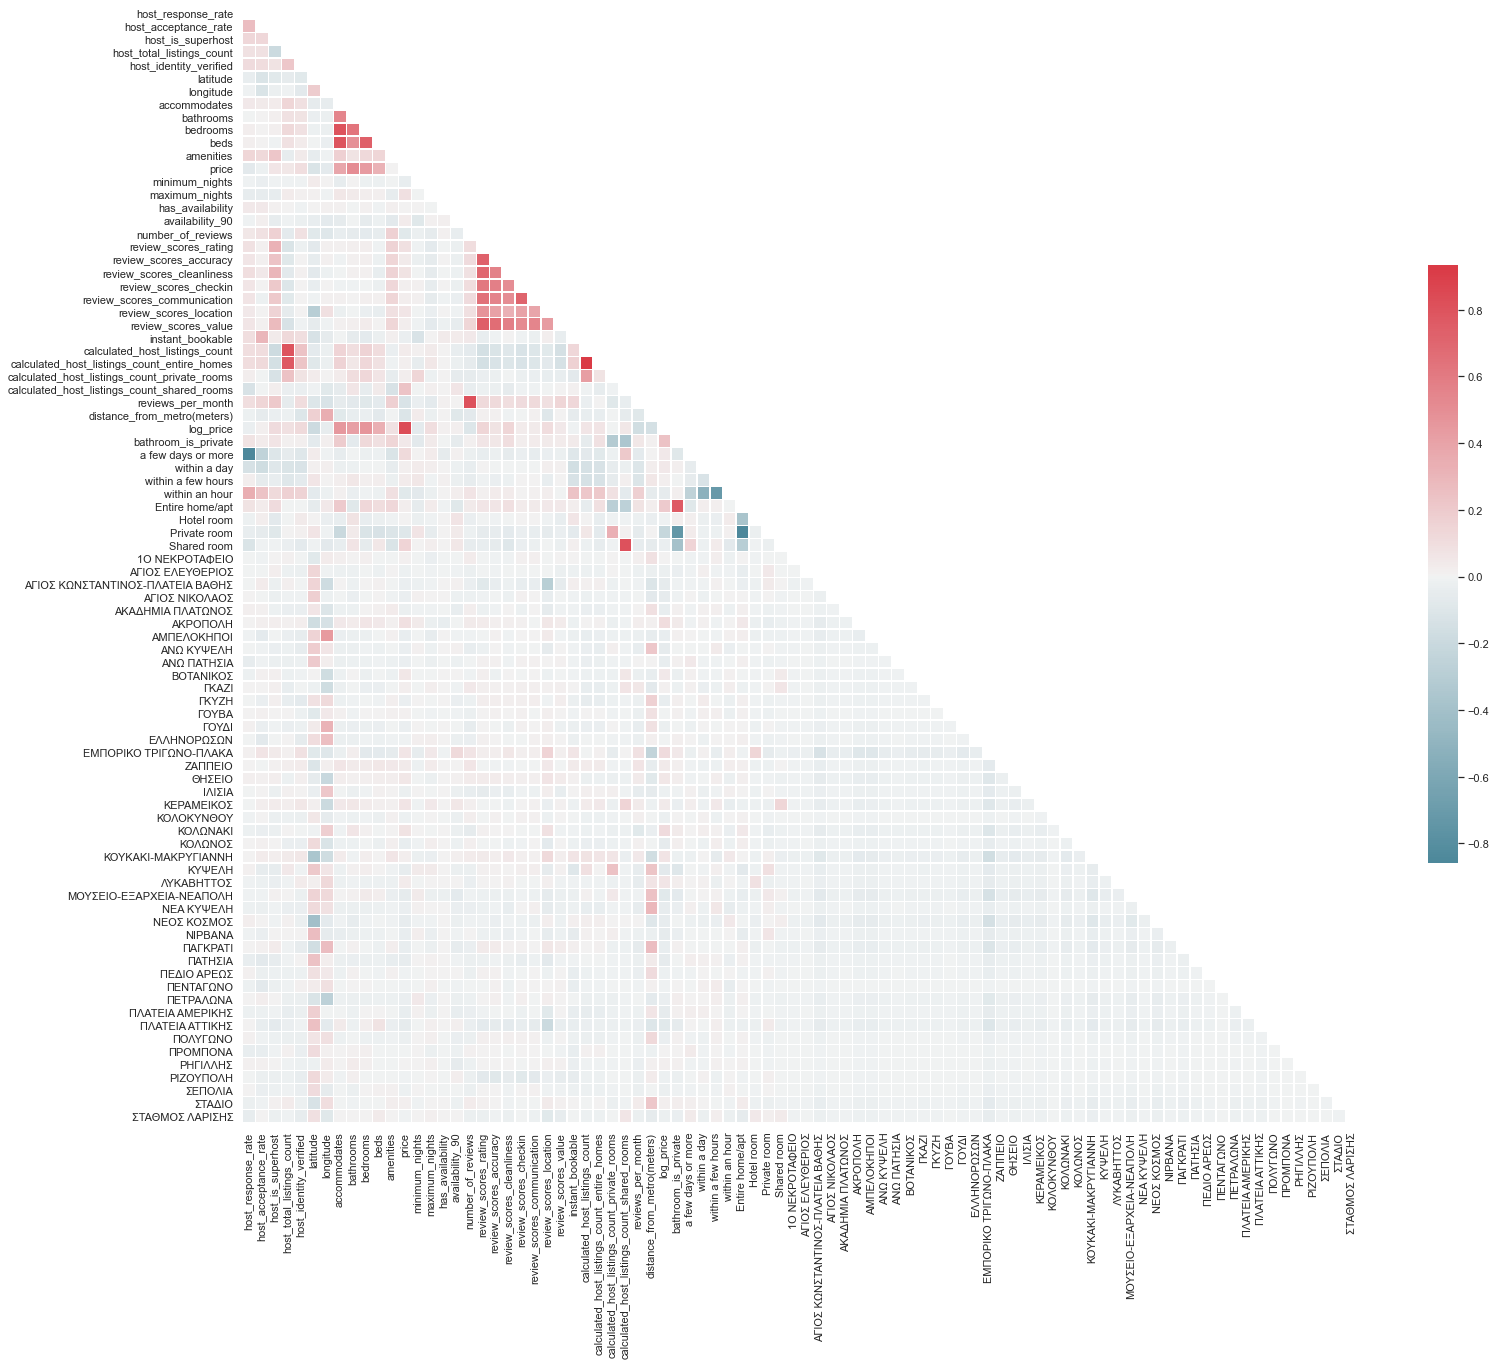

In [50]:
import numpy as np
sns.set(style="white")

# Create a covariance matrix
corr = df1.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25,22))

 # Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

In [51]:
corr['price'].sort_values(ascending=False)[2:10]

bathrooms                                      0.510851
bedrooms                                       0.439430
accommodates                                   0.383841
beds                                           0.318013
calculated_host_listings_count_shared_rooms    0.235916
Shared room                                    0.155296
a few days or more                             0.116251
host_identity_verified                         0.094562
Name: price, dtype: float64

In [52]:
df1 = df1.drop(['number_of_reviews','review_scores_rating','review_scores_accuracy',
         'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
             'minimum_nights','maximum_nights','has_availability','availability_90'],axis=1)

In [53]:
df1.shape

(5374, 74)

In [54]:
df1.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_from_metro(meters),log_price,bathroom_is_private,a few days or more,within a day,within a few hours,within an hour,Entire home/apt,Hotel room,Private room,Shared room,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,ΑΚΡΟΠΟΛΗ,ΑΜΠΕΛΟΚΗΠΟΙ,ΑΝΩ ΚΥΨΕΛΗ,ΑΝΩ ΠΑΤΗΣΙΑ,ΒΟΤΑΝΙΚΟΣ,ΓΚΑΖΙ,ΓΚΥΖΗ,ΓΟΥΒΑ,ΓΟΥΔΙ,ΕΛΛΗΝΟΡΩΣΩΝ,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,ΖΑΠΠΕΙΟ,ΘΗΣΕΙΟ,ΙΛΙΣΙΑ,ΚΕΡΑΜΕΙΚΟΣ,ΚΟΛΟΚΥΝΘΟΥ,ΚΟΛΩΝΑΚΙ,ΚΟΛΩΝΟΣ,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,ΚΥΨΕΛΗ,ΛΥΚΑΒΗΤΤΟΣ,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,ΝΕΑ ΚΥΨΕΛΗ,ΝΕΟΣ ΚΟΣΜΟΣ,ΝΙΡΒΑΝΑ,ΠΑΓΚΡΑΤΙ,ΠΑΤΗΣΙΑ,ΠΕΔΙΟ ΑΡΕΩΣ,ΠΕΝΤΑΓΩΝΟ,ΠΕΤΡΑΛΩΝΑ,ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,ΠΟΛΥΓΩΝΟ,ΠΡΟΜΠΟΝΑ,ΡΗΓΙΛΛΗΣ,ΡΙΖΟΥΠΟΛΗ,ΣΕΠΟΛΙΑ,ΣΤΑΔΙΟ,ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ
0,100.0,97.0,1,6.0,1,37.98863,23.76527,8,2.0,3.0,5.0,16.596542,84.0,1,6,6,0,0,0.21,517.290182,4.430817,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100.0,97.0,1,6.0,1,37.98903,23.76448,4,1.0,1.0,1.0,18.256605,50.0,1,6,6,0,0,0.43,456.124476,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100.0,97.0,1,6.0,1,37.98888,23.76473,2,1.0,1.0,1.0,15.197941,40.0,1,6,6,0,0,0.57,477.307520,3.688879,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100.0,97.0,1,6.0,1,37.98903,23.76448,4,1.0,1.0,2.0,15.483294,50.0,1,6,6,0,0,0.18,456.124476,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100.0,97.0,1,6.0,1,37.98924,23.76500,4,1.0,1.0,1.0,17.269814,50.0,1,6,6,0,0,0.17,445.556888,3.912023,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
